In [1]:
import matplotlib.pyplot as plt
import pandas as pd

input_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/water_fraction/merged_water_fraction.csv'
data = pd.read_csv(input_base)

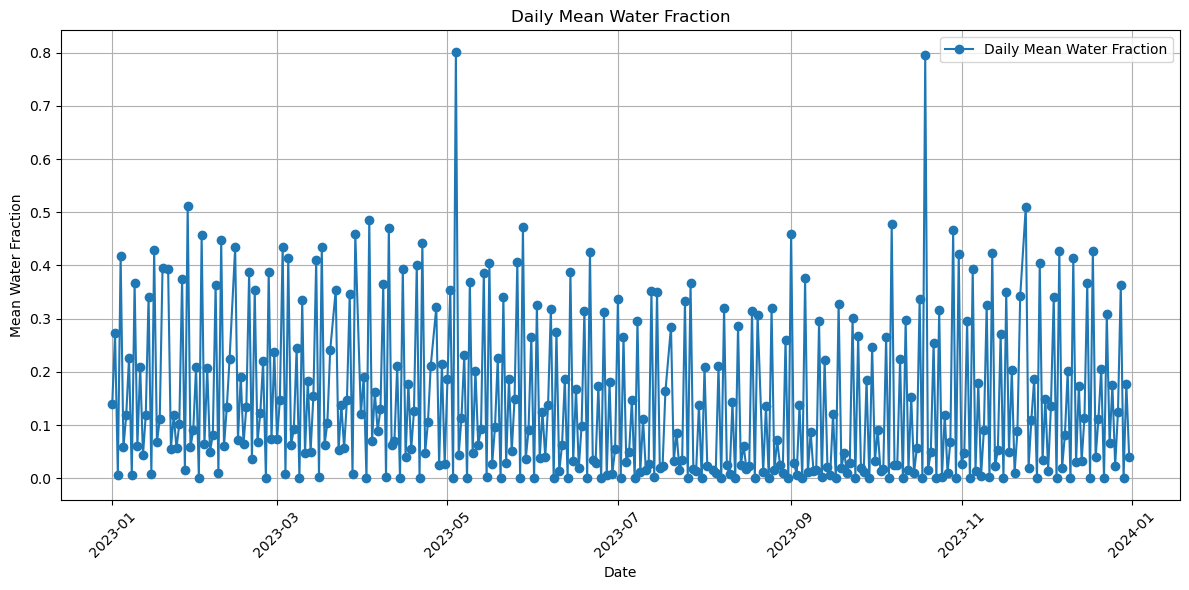

In [3]:
# Convert the 'date' column to datetime format for grouping
data['date'] = pd.to_datetime(data['date'], format='mixed', errors='coerce')

# Calculate daily mean of 'water_fraction'
daily_mean = data.groupby('date')['water_fraction'].mean()

# Plot the daily mean water fraction
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean.values, marker='o', linestyle='-', label='Daily Mean Water Fraction')
plt.title('Daily Mean Water Fraction')
plt.xlabel('Date')
plt.ylabel('Mean Water Fraction')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

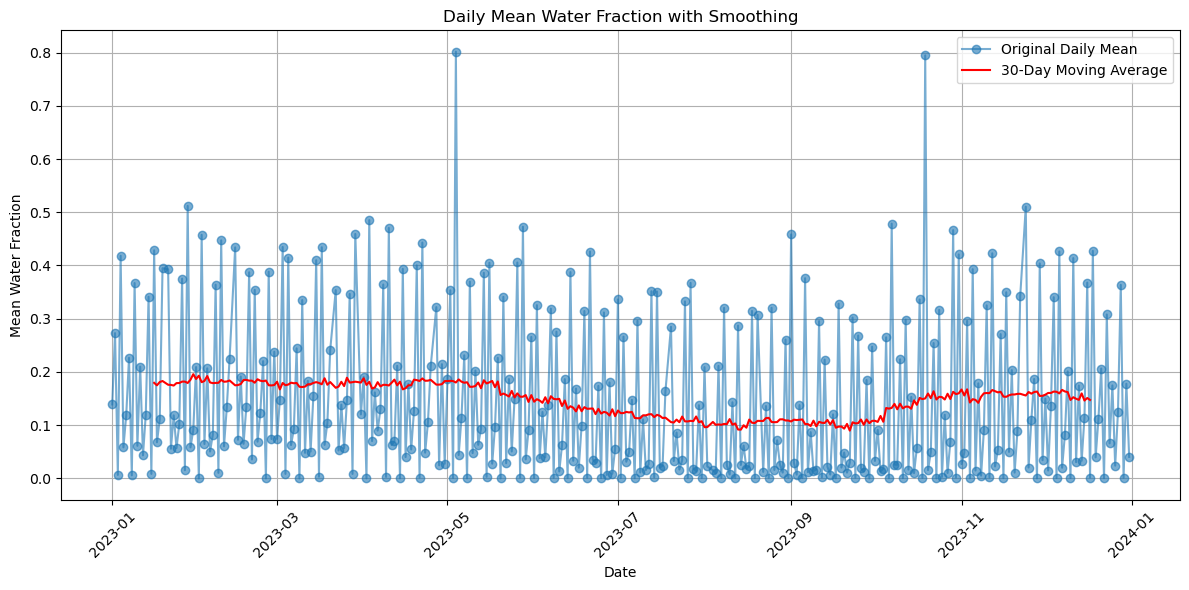

In [6]:
# Apply a moving average with a window size of your choice, e.g., 7 days
window_size = 30  # Adjust the window size as needed
daily_mean_smoothed = daily_mean.rolling(window=window_size, center=True).mean()

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean.values, marker='o', linestyle='-', label='Original Daily Mean', alpha=0.6)
plt.plot(daily_mean_smoothed.index, daily_mean_smoothed.values, color='red', label=f'{window_size}-Day Moving Average')
plt.title('Daily Mean Water Fraction with Smoothing')
plt.xlabel('Date')
plt.ylabel('Mean Water Fraction')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()